In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load cleaned data
df = pd.read_csv('../data/housing_cleaned.csv')

# Separate features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# **IMPORTANT: Save feature names**
feature_names = X.columns.to_list()
print(f'Training with {len(feature_names)} features: {feature_names}')

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training set: {X_train.shape}')
print(f'Test set: {X_test.shape}')

Training with 11 features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'ocean_proximity', 'bedrooms_per_room', 'rooms_per_household', 'population_per_household']
Training set: (16512, 11)
Test set: (4128, 11)


In [3]:
# Model 1: Linear Regression (baseline)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Evaluate
print('Linear Regression Results:')
print(f'Train R²: {r2_score(y_train, lr_train_pred):.4f}')
print(f'Test R²: {r2_score(y_test, lr_test_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, lr_test_pred):.2f}')
# Root Mean Square Error
print(f'RMSE²: {np.sqrt(mean_squared_error(y_test, lr_test_pred)):.2f}')

Linear Regression Results:
Train R²: 0.6524
Test R²: 0.5813
MAE: 51647.88
RMSE²: 74067.79


In [4]:
# Model 2: Random Forest (should outperform)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(f"Train R²: {r2_score(y_train, rf_train_pred):.2f}%")
print(f"Test R²: {r2_score(y_test, rf_test_pred):.2f}%")
print(f"MAE: ${mean_absolute_error(y_test, rf_test_pred):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, rf_test_pred)):,.2f}")

Random Forest Results:
Train R²: 0.97%
Test R²: 0.81%
MAE: $32,321.17
RMSE: $50,161.42


In [5]:
print("Train R²:", r2_score(y_train, rf_train_pred))
print("Test R²:", r2_score(y_test, rf_test_pred))

Train R²: 0.9743984253534241
Test R²: 0.8079860511742608


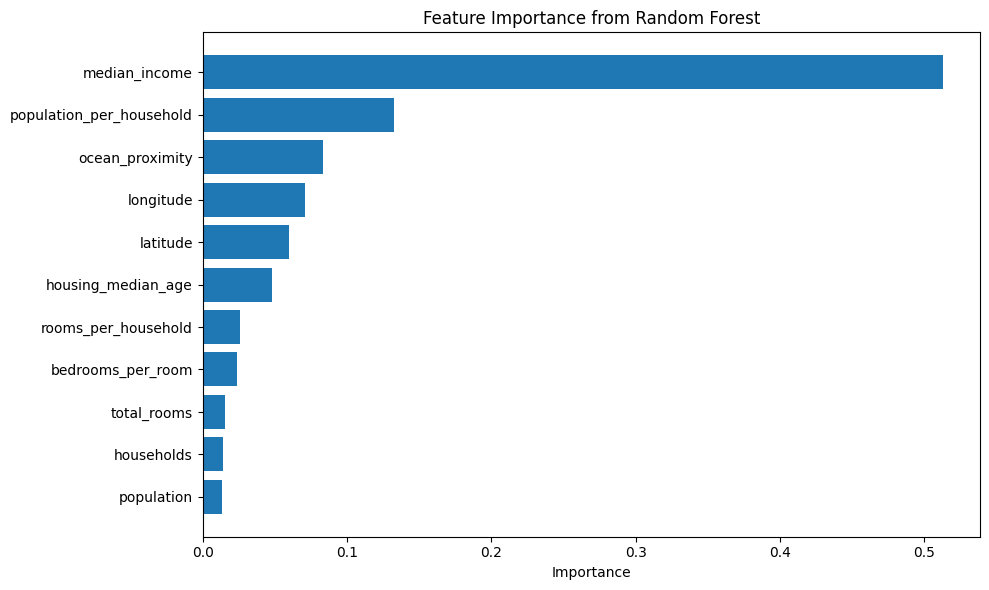

                     feature  importance
6              median_income    0.512905
10  population_per_household    0.132550
7            ocean_proximity    0.083080
0                  longitude    0.071034
1                   latitude    0.059702
2         housing_median_age    0.048262
9        rooms_per_household    0.025939
8          bedrooms_per_room    0.023678
3                total_rooms    0.015433
5                 households    0.013821
4                 population    0.013598


In [6]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(feature_importance)

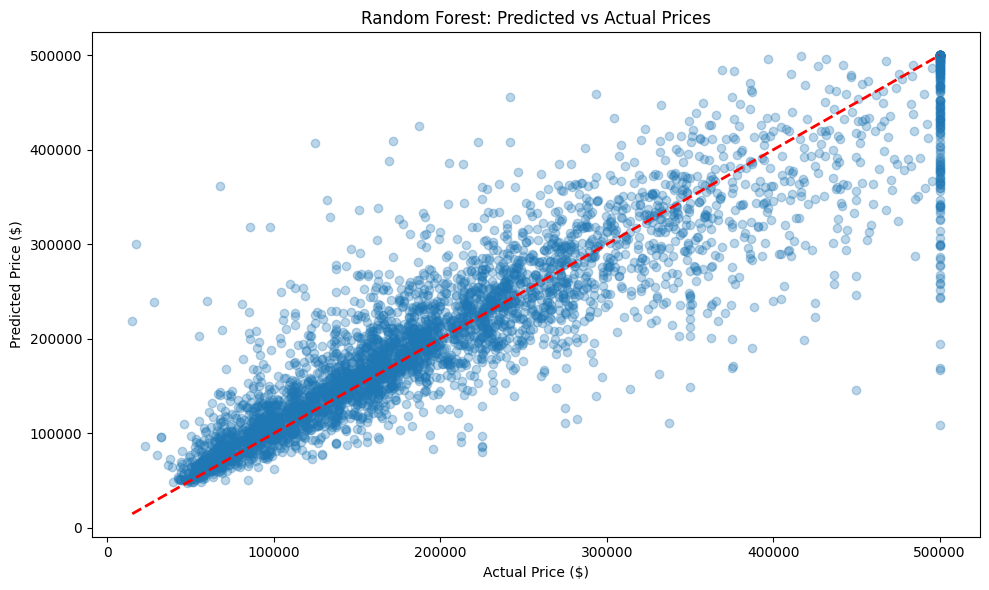

In [7]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Random Forest: Predicted vs Actual Prices')
plt.tight_layout()
plt.show()

In [8]:
# # Save the best model
joblib.dump(rf_model, '../models/housing_price_model.pkl')
# joblib.dump(feature_names, '../models/feature_names.pkl')
print('Model Saved!')

Model Saved!
